In [2]:
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;sns.set()


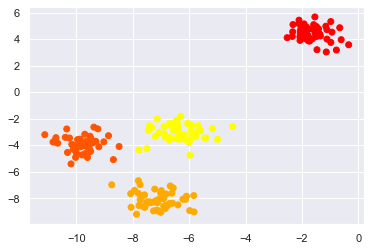

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(200, centers = 4, cluster_std = .6, random_state = 1)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'autumn')

## Clustering with KMeans

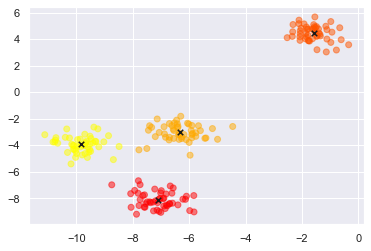

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
y_pred = model.fit_predict(X)
centers = model.cluster_centers_
plt.scatter(X[:,0], X[:,1], c = y_pred, cmap = 'autumn', alpha = .5)
plt.scatter(centers[:,0], centers[:,1], marker = 'x', color = 'k', s = 30)

## Where KMeans may fail?

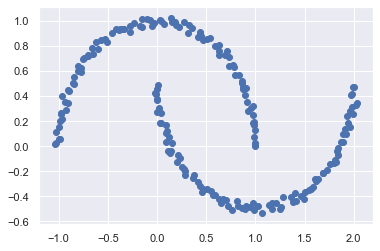

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = .02)
plt.scatter(X[:,0], X[:,1])

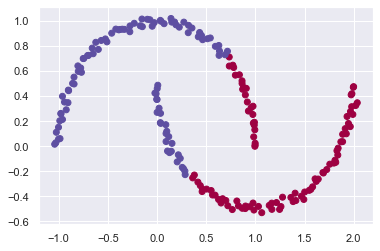

In [26]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'Spectral')

## Addressing problem: Spectral Clustering

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


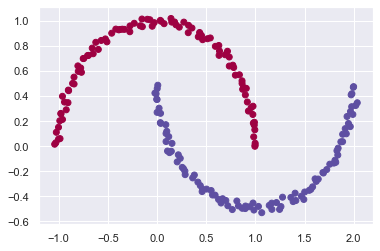

In [30]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(affinity='nearest_neighbors', n_clusters=2)
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'Spectral')
SpectralClustering?

# Example

## KMeans on the digits datasets

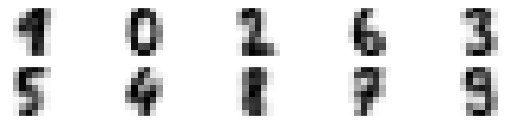

In [35]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()
model = KMeans(n_clusters = 10)
model.fit(digits.data)
fig, axes = plt.subplots(2, 5, figsize = (10, 2), subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = {'hspace' : 0.2, 'wspace' : 0})
for i, ax in enumerate(axes.flat):
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap = 'binary', interpolation = 'nearest')

In [40]:
%%HTML
<h3>Mapping the index of the cluster to the number representation of that cluster</h3>
<p>E.g: the <b>0<sup>th</sup> cluster</b> is <b>number 9</b>, the <b>2<sup>th</sup> cluster</b> is <b>number 5</b>, etc....</p>

In [59]:
from scipy.stats import mode
y_pred = model.predict(digits.data)
labels = np.zeros_like(y_pred)
for i in range(10):
    mask = y_pred == i
    labels[mask] = mode(digits.target[mask])[0]

In [36]:
%%HTML
<h2>Validation</h2>

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = mapping[y_pred]

accuracy_score(labels, digits.target)

0.7946577629382304

In [62]:
report = classification_report(digits.target, labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.56      0.30      0.39       182
           2       0.84      0.84      0.84       177
           3       0.85      0.86      0.86       183
           4       0.98      0.92      0.95       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.85      0.94      0.89       179
           8       0.46      0.60      0.52       174
           9       0.59      0.77      0.67       180

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.79      1797
weighted avg       0.80      0.79      0.79      1797



Text(89.18, 0.5, 'Predict label')

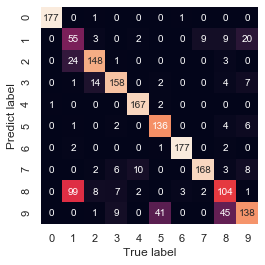

In [65]:
matrix = confusion_matrix(digits.target, labels)
sns.heatmap(matrix.T, annot = True, square = True, cbar = False, fmt = 'd')
plt.xlabel('True label')
plt.ylabel('Predict label')

### Optimization: Embedding in lower dimensional space by using TSNE bfore applying KMeans

In [69]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

data = TSNE(n_components = 2).fit_transform(digits.data)
clusters = KMeans(n_clusters = 10).fit_predict(data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = clusters == i
    labels[mask] = mode(digits.target[mask])[0]
accuracy_score(labels, digits.target)

0.9454646633277685

## KMeans: Color compression

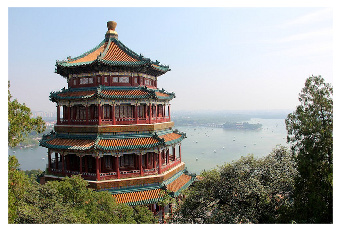

In [86]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
def decorate():
    ax = plt.gca()
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
decorate()

In [73]:
china.shape

(427, 640, 3)

Text(0.5, 1.0, 'Compressed image')

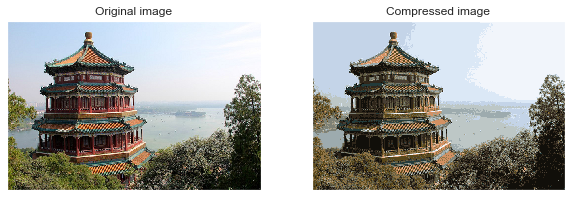

In [94]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans
data = china.reshape((-1,3))
#Compression to 16 colors
model = MiniBatchKMeans(n_clusters = 16)
compressed_mask = model.fit_predict(data)
compressed = model.cluster_centers_[compressed_mask].reshape((427, 640, 3))
compressed = compressed.astype('int')

fig, axes = plt.subplots(1,2, subplot_kw = {'xticks': [], 'yticks': []}, figsize = (10, 8))
axes[0].imshow(china)
axes[0].set_title('Original image')
axes[1].imshow(compressed)
axes[1].set_title('Compressed image')